In [87]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Data Analysis
### Connor Farrar 21/11/23

## Album Choices

### I chose the albums A Night At the Opera by Queen and Social Cues by Cage The Elephant. I mostly listen to one off songs by lots of different artists, but I found that a lot of my favorite songs are from theses two albums, so I decided to use those.

## Audio Feature Choices

### I decided to look at Energy since both Queen and Cage the Elephant are primarily rock bands. Normally I relate rock bands to high energy music, so I wanted to see if that was the case with these two albums. I also decided to look at Valence because I belive that songs in A Night At the Opera will be generally more upbeat than songs in Social Cues. Queen songs are normally more energetic and upbeat while Cage the Elephant songs can be a bit more somber while still being enegetic. 

#### Create a dataframe for the audio features of the two albums

In [88]:
af = pd.read_csv('data_analysis_audio.csv')
af.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0,0.395,0.698,2,-6.244,1,0.0573,0.3340,0.000064,0.1550,0.455,124.660,audio_features,7jW1qSS0NJciZQ4lzPCSwk,spotify:track:7jW1qSS0NJciZQ4lzPCSwk,https://api.spotify.com/v1/tracks/7jW1qSS0NJci...,https://api.spotify.com/v1/audio-analysis/7jW1...,223173,4,queen
1,1,0.643,0.579,3,-9.165,1,0.0555,0.4450,0.001070,0.1090,0.712,131.901,audio_features,5evxr7Opn6r6XDgzDMGVo7,spotify:track:5evxr7Opn6r6XDgzDMGVo7,https://api.spotify.com/v1/tracks/5evxr7Opn6r6...,https://api.spotify.com/v1/audio-analysis/5evx...,67400,4,queen
2,2,0.299,0.818,4,-8.542,0,0.0683,0.0129,0.000009,0.2020,0.340,143.583,audio_features,4WX7njDAz4cDSDPr8Vcj6j,spotify:track:4WX7njDAz4cDSDPr8Vcj6j,https://api.spotify.com/v1/tracks/4WX7njDAz4cD...,https://api.spotify.com/v1/audio-analysis/4WX7...,184893,3,queen
3,3,0.518,0.761,0,-7.025,1,0.0452,0.1580,0.007650,0.0715,0.576,118.738,audio_features,2RCnr8CRWxBVSnXBur7CIw,spotify:track:2RCnr8CRWxBVSnXBur7CIw,https://api.spotify.com/v1/tracks/2RCnr8CRWxBV...,https://api.spotify.com/v1/audio-analysis/2RCn...,170800,4,queen
4,4,0.519,0.584,8,-9.670,1,0.0270,0.0275,0.000000,0.1110,0.336,101.632,audio_features,02MiyVckOBtygUOEDnV7Pd,spotify:track:02MiyVckOBtygUOEDnV7Pd,https://api.spotify.com/v1/tracks/02MiyVckOBty...,https://api.spotify.com/v1/audio-analysis/02Mi...,210800,4,queen


# Histograms

#### Create histograms that display the valence and energy of the two albums individually and against one another

<function matplotlib.pyplot.show(close=None, block=None)>

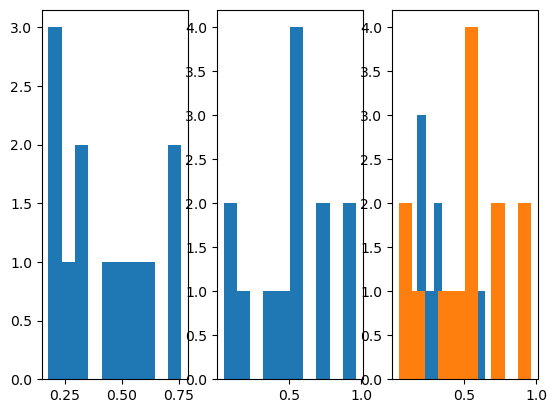

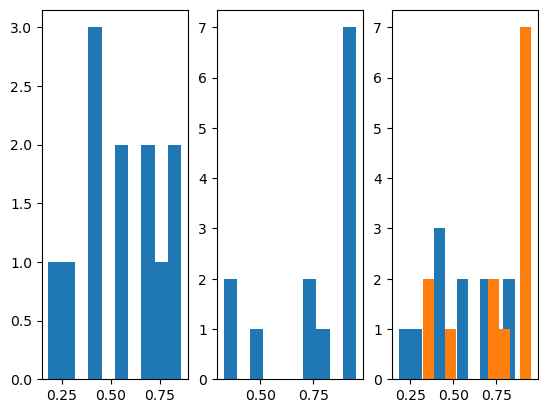

In [89]:
queen_valence = af[af['album'] == 'queen']['valence']
cte_valence = af[af['album'] == 'cte']['valence']
queen_energy = af[af['album'] == 'queen']['energy']
cte_energy = af[af['album'] == 'cte']['energy']

# Queen is displayed in blue
# CTE is displayed in orange


fig1, ax1 = plt.subplots(1, 3)
ax1[0].hist(queen_valence)
ax1[1].hist(cte_valence)
ax1[2].hist(queen_valence)
ax1[2].hist(cte_valence)

fig2, ax2 = plt.subplots(1, 3)
ax2[0].hist(queen_energy)
ax2[1].hist(cte_energy)
ax2[2].hist(queen_energy)
ax2[2].hist(cte_energy)

plt.show

## Histogram Conclusion
#### The histograms tell me that A Night At The Opera and Social Cues have relatively similar valence scores, with the exception of one outlier from Social Cues having a significantly higher valence score than most of the songs in the two albums. 
#### It is also made clear the the two albums have similar energy scores, with Social Cues yet again having a track in the album that has a significantly higher energy than any of the other tracks in the two albums.

# Scatter Plots

#### Create two scatter plots, one for A Night At The Disco and one for Social Cues, that display the valence on the x axis and the energy on the y axis

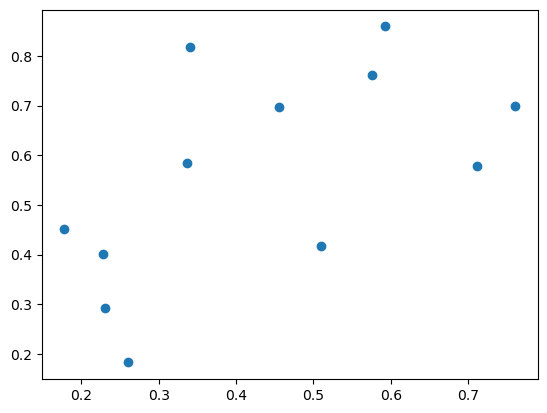

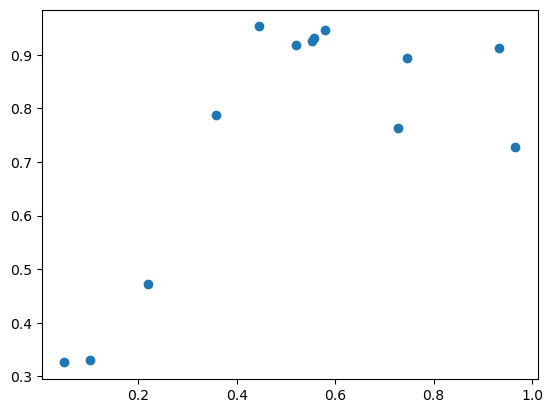

In [90]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = queen_valence,
            y = queen_energy)

fig4, ax4 = plt.subplots()
ax4.scatter(x = cte_valence,
            y = cte_energy)


plt.show()

#### Create a scatter plot that compares the two albums, with valence being on the x axis and energy on the y axis

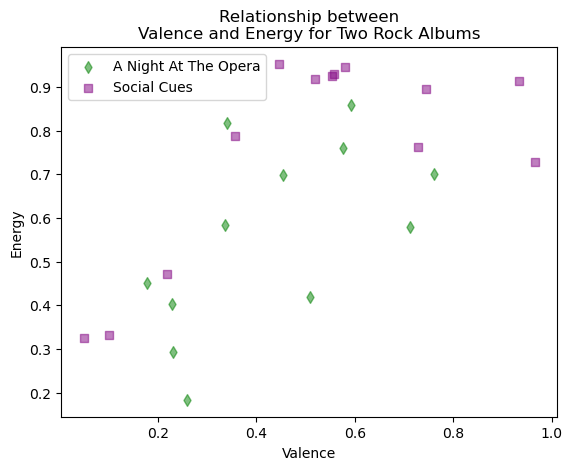

In [91]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = queen_valence,
            y = queen_energy,
            label = 'A Night At The Opera',
            color = 'green',
            marker = 'd',
            alpha = .5)

ax3.scatter(x = cte_valence,
            y = cte_energy,
            label = 'Social Cues',
            color = "purple",
            marker = 's',
            alpha = .5)

ax3.set_title('Relationship between\nValence and Energy for Two Rock Albums')
ax3.set_xlabel('Valence')
ax3.set_ylabel('Energy')
ax3.legend()
plt.show()

## Scatter Plot Improvements
### In order to improve the the figure to better show the the differences between albums I changed the color and shape of the points representing each album. A Night At The Opera is represented by the green diamonds while Social Cues is represented by the purple squares. These shapes and colors contrast with one another making it easier to view the data. I made the points more opaque so that intersecting points are more visible and not hidden behind one another. 

# Boxplots

#### Create a boxplot that displays the variation of the danceability for both albums

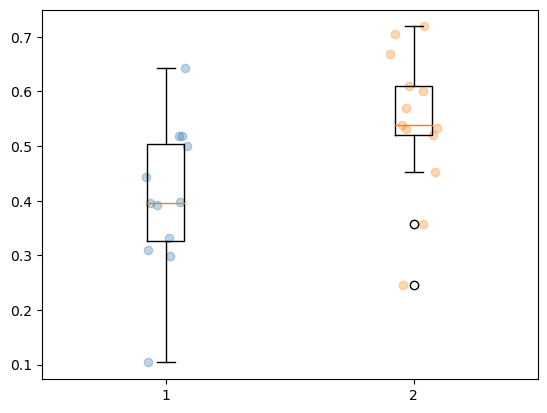

In [96]:
queen_dance = af[af['album'] == 'queen']['danceability']
cte_dance = af[af['album'] == 'cte']['danceability']

queen_xs = [1] * len(queen_dance)
cte_xs = [2] * len(cte_dance)
queen_x_jitter = np.random.uniform(-.10, .10, len(queen_xs))
cte_x_jitter = np.random.uniform(-.10, .10, len(cte_xs))

fig4, ax4 = plt.subplots()
ax4.boxplot(queen_dance, positions = [1])
ax4.boxplot(cte_dance, positions = [2])
ax4.scatter(queen_xs + queen_x_jitter, queen_dance, alpha = .3)
ax4.scatter(cte_xs + cte_x_jitter, cte_dance, alpha = .3)

#### Run a ttest

In [95]:
stats.ttest_ind(queen_dance, cte_dance)

TtestResult(statistic=-2.5421151972247853, pvalue=0.01821502210068855, df=23.0)

### The pvalue of the ttest is below 0.05, which tells us that the statistic is reliable. The statistic result (or T-Value) is around -2.5, which displays a low level of variation betwen the two mean dancability scores for the two albums. The df result is just the number of independent pieces of information used for the ttest. 

# Conclusions
## Valence & Energy
### The two albums have similar valences and energies. Although there was a slight degree of variation and one or two outlier, the two albums are very similar in regards to valence and energy. 
## Dancebility
### As stated before, there is a low level of variation for the danceability scores of the two albums. The p-value of the ttest suggests that the data is reliable as the pvalue was less than 0.05 at about 0.018. 
## Potential Next Steps
### This analysis was focused solely on two albums, so it isn't possible to make conclusions about the bands as a whole. However, I think it would be interesting to analyze multiple albums from both bands to see if my findings hold true throughout. This would allow me analyze the bands as a whole rather than just the snippet seen in one album from each band. 